# Latar Belakang dan Rumusan Masalah

## Latar Belakang:
Di tengah persaingan industri retail yang semakin kompetitif, pemahaman terhadap perilaku pelanggan menjadi hal krusial dalam menyusun strategi pemasaran yang efektif dan berkelanjutan. Supermarket Indoe, yang berlokasi di kawasan perumahan DBS, bersaing secara langsung dengan dua supermarket lain yang menawarkan produk dan promosi serupa. Dalam kondisi tersebut, kemampuan untuk mengenali kebutuhan dan preferensi pelanggan menjadi salah satu keunggulan kompetitif utama.

Supermarket Indoe telah menerapkan sistem keanggotaan (membership) yang merekam data pelanggan, termasuk informasi demografis seperti usia, status pernikahan, dan tingkat pendidikan, serta data pembelian berdasarkan kategori produk, saluran pembelian, dan respons terhadap campaign marketing yang telah dilakukan.

Melalui pemanfaatan data ini, perusahaan berupaya untuk memperoleh insight yang relevan mengenai perilaku pelanggan yang dapat digunakan untuk menyusun strategi peningkatan penjualan, menentukan karakteristik pelanggan potensial, serta mengoptimalkan campaign marketing agar lebih tepat sasaran dan efektif

## Rumusan Masalah:
Dari latar belakang di atas, ditemukan rumusan masalah sebagai berikut:
1. Bagaimana karakteristik demografis pelanggan Supermarket Indoe di kawasan DBS? (year_birth, education, marital_status, income, etc)
2. Bagaimana pola perilaku belanja pelanggan berdasarkan kategori produk? (rata2 pengeluaran customer, frekuensi visit)
3. Melalui channel apa pelanggan paling sering melakukan pembelian? (web, offline, katalog, etc)
4. Bagaimana karakteristik pelanggan yang merespons campaign dan berpotensi meningkatkan penjualan?

## Tujuan
Memberikan insights yang optimal kepada Owner Supermarket

In [6]:
# Import Library
# Data Analisis
import pandas as pd
import numpy as np

# Data Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import missingno

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Understanding

In [7]:
# Load Dataset
df = pd.read_csv('C:/Users/HP/Downloads/Supermarket Customers.csv', sep = '\t') # separator
df.shape

(2240, 29)

In [8]:
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Dari dataset di atas, berikut penjelasan setiap kolomnya:
- ID: ID unik pelanggan
- Year_Birth: Tahun lahir 
- Education: Tingkat pendidikan
- Marital_Status: Status pernikahan
- Income: Penghasilan/ Pendapatan tiap tahun
- Kidhome: Jumlah anak di rumah tangga
- Teenhome: Jumlah anak remaja di rumah tangga
- Dt_Customer: Tanggal pelanggan mendaftar sebagai customer
- MntWines: Jumlah uang yang dihabiskan untuk Wine dalam 2 tahun terakhir
- MntFruits: Jumlah uang yang dihabiskan untuk Buah dalam 2 tahun terakhir
- MntMeatProducts: Jumlah uang yang dihabiskan untuk Daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah uang yang dihabiskan untuk Ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah uang yang dihabiskan untuk Manisan dalam 2 tahun terakhir
- MntGoldProds: Jumlah uang yang dihabiskan untuk Emas dalam 2 tahun terakhir
- NumDealsPurchases: Jumlah pembelian saat diskon
- NumWebPurchases: Frekuensi pembelian via Website
- NumCatalogPurchases: Frekuensi pembelian via Catalog
- NumStorePurchases: Frekuensi pembelian via Toko (offline)
- NumWebVisitsMonth: Frekuensi kunjungan Website
- AcceptedCmp1 - Cmp5: 1 jika pelanggan menggunakan offer di Campaign ke-1 hingga 5, 0 jika tidak
- Response: 1 jika customer menerima penawaran di campaign terakhir, 0 jika tidak 
- Recency: Jumlah pembelian terakhir pelanggan
- Complain: 1 jika pelanggan complain di 2 tahun terakhir, 0 jika tidak


In [9]:
df.info() # cek info dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# tipe data dari kolom dt_customer (tanggal customer mendaftar sebagai member) masih dalam tipe data string,
# maka perlu diconvert menggunakan datetime agar dapat dioperasikan
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)

In [11]:
# mengecek apa ada data yang terduplikat
df.duplicated().sum()

np.int64(0)

Data di atas tidak ada yang terduplikasi.

In [12]:
display (df.describe(), df.describe(include = object))

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [13]:
# mencari terdapat kolum data yang kosong atau tidak
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
df = df.dropna (subset = ['Income'])

Karena terdapat nilai kosong di kolom Income, maka decide untuk didrop saja karena data hanya 24 baris, agar tidak mempengaruhi hasil dari keseluruhan data. Karena semisal diimputasi/ diisi, penyebaran data pun random, agar tidak terjadi hal yang tidak akurat seperti, contoh: ['income'] yang tinggi pada kolom ['Education'] yang status pendidikannya Basic/ lulusan SMA.

In [15]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<Axes: >

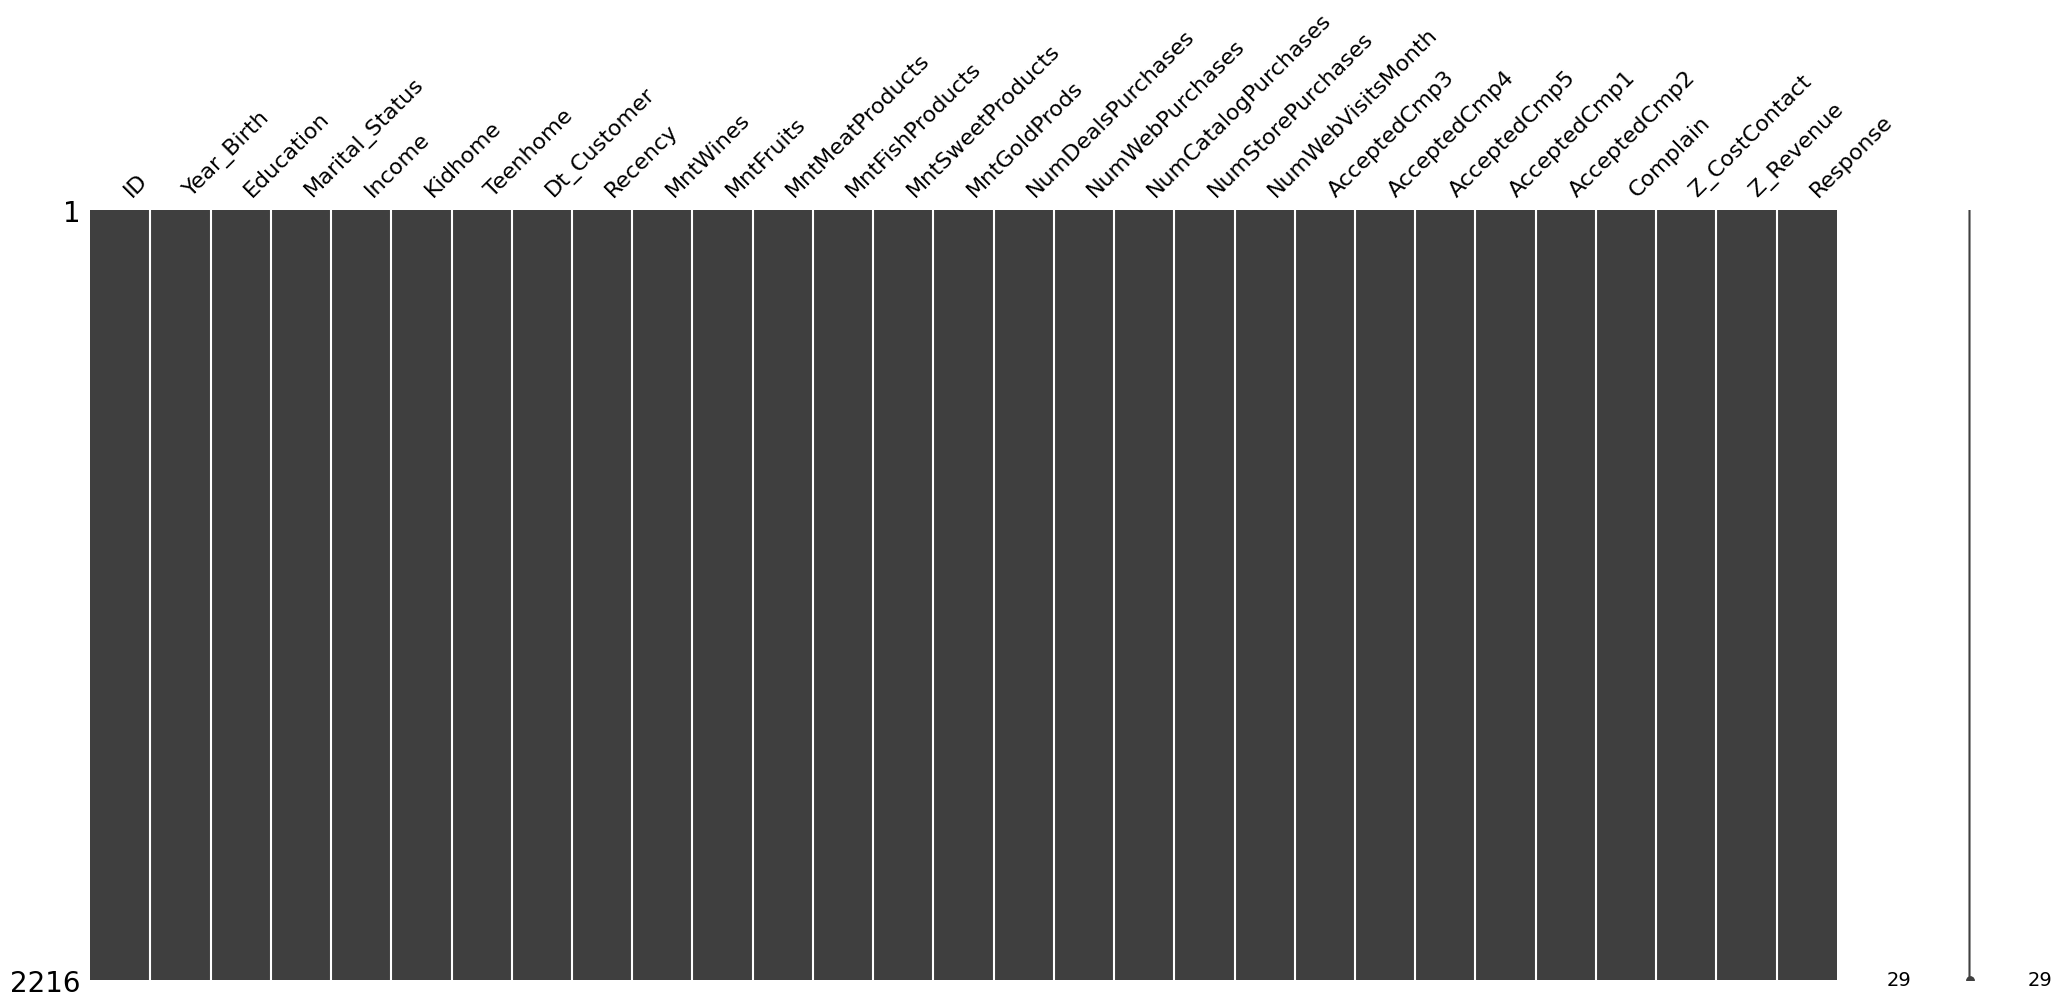

In [16]:
missingno.matrix(df)

Data telah aman.

In [17]:
# melihat nilai unik dan banyaknya nilai tersebut

pd.set_option('display.max_colwidth', None)
list = []
for col in df.columns:
    list.append ([col, df[col].nunique(), df[col].unique()])

tabel1 = pd.DataFrame (columns = ['Column Name', 'Number of Unique', 'Unique Sample'], 
                       data = list)
tabel1

,Column Name,Number of Unique,Unique Sample
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013

Secara umum, kita bisa melihat bahwa:
- dataset Supermarket Customer memiliki 29 kolom dan 2216 baris
- kolom ['ID'] merupakan kolom berisi nomer ID pelanggan dan tidak relevan dalam analisis sehingga didrop saja
- pada kolom ['Marital_Status'], terdapat jawaban absurd, maka bisa disortir lagi
- di kolom ['Year_Birth'] terdapat outlier yang lahir di tahun 18xx
- range nominal ['Income'] bervariasi
- kolom ['Z_CostContact'] dan ['Z_Revenue'] bisa didrop karena tidak terdaftar di Dictionary

In [18]:
df = df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1).reset_index() # menghapus columns

In [19]:
df.info() # cek kolom berhasil terhapus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

### Kolom Age

<Axes: xlabel='Age'>

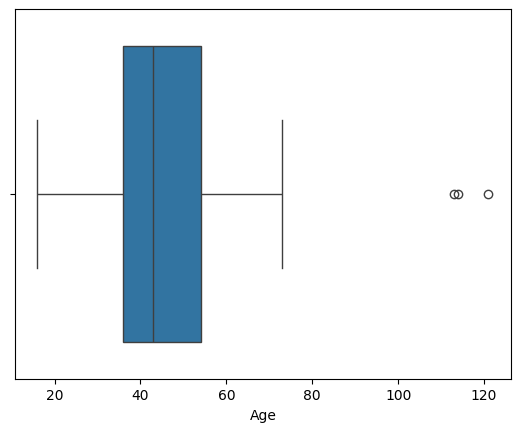

In [20]:
# kolom year birth dihitung dan diubah menjadi satuan Usia
df['Customer_Year'] = df['Dt_Customer'].dt.year # membuat kolom baru ['Customer_Year'] yang di mana sama dengan tahun pelanggan mendaftar
df['Age'] = df['Customer_Year'] - df['Year_Birth'] # membuat kolom ['Age'] yang merupakan hasil dari pengurangan tahun pelanggan mendaftar
                                                   # dan tahun lahir mereka.

# visualisasi kolom Age
sns.boxplot(x = df['Age'])

Terdapat 3 outlier pada kolom Age.

Translation boxplot:
- nilai minimum di usia 16 dan maksimum di 73 (berdasarkan df['Age'].describe())
- median ada di usia 43
- quartil bawah ada di kisaran usia 35
- quartil atas ada di usia 55 (asumsi)

In [21]:
display (df['Age'].describe(), df['Age'].unique())

count    2216.000000
mean       44.208032
std        12.023812
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

array([ 55,  60,  48,  30,  33,  46,  41,  28,  39,  64,  36,  54,  61,
        25,  66,  32,  27,  34,  63,  62,  44,  37,  24,  50,  42,  67,
        43,  70,  38,  16,  45,  58,  57,  35,  47,  26,  31,  65,  40,
        53,  52,  68,  49,  21,  51,  22,  29,  20, 113,  59, 121,  23,
        56, 114,  71,  72,  69,  19,  18,  17,  73])

Berdasarkan data-data umur yang terdaftar, bisa dilihat usia yang paling muda berada di 16 tahun (kategori teenager), dan terdapat usia > 100 (113, 114, 121), bisa diidentifikasi sebagai outlier atau data yang jauh berbeda dari kebanyakan nilai lainnya. Maka bisa dipertimbangkan untuk dihapus saja.

In [22]:
df[df['Age'] >= 100] # mengecek berapa banyak customer yang berusia > 100

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Age
181,192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,0,2013,113
228,239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,2014,121
326,339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,2013,114


Terdapat 3 baris/ pelanggan yang berusia di atas 100, bisa diasumsikan user salah memasukkan tahun lahir dan sebaiknya dihapus saja, karena kecil kemungkinan seseorang di umur sekian masih aktif berbelanja.

In [23]:
df = df[df['Age'] <= 100] # menghapus baris pelanggan yang berusia > 100

<Axes: xlabel='Age', ylabel='Count'>

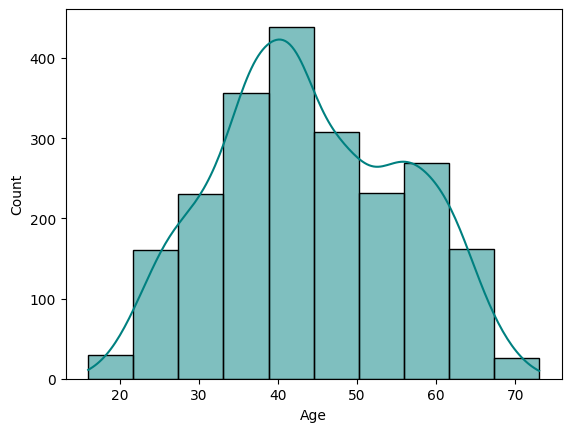

In [24]:
# visualisasi
df_plot = df[df['Age'] <= 80]  # batas atas usia 80 tahun

sns.histplot(df_plot['Age'], bins = 10, kde = True, color = 'teal')

Insights:
- Mayoritas pelanggan berusia 35–55 tahun
- Terlihat dari puncak grafik (peak) yang berada di rentang tersebut
- Ini berarti segmen usia produktif dan mapan adalah target utama supermarket
- Distribusi mendekati normal (bell-shaped)
- Grafik ini simetris dan menyerupai kurva normal meskipun tidak sempurna
- Jumlah pelanggan berusia muda (<25) dan tua (>65) relatif lebih sedikit
- Artinya supermarket tidak terlalu menarik pelanggan di rentang usia tersebut, atau mungkin memang tidak jadi target utama

In [25]:
df['Age'].describe()

count    2213.000000
mean       44.110709
std        11.736750
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64

In [26]:
# Pengelompokkan Usia berdasarkan Label
age_range = [0, 19, 27, 49, 75]

labels = ['teenager', 'young adult', 'adult', 'elder']

df['Age_Group'] = pd.cut (df['Age'], bins = age_range, labels = labels)

# Hitung jumlah pelanggan per kelompok
jumlah_pelanggan = df['Age_Group'].value_counts().sort_index() # sort_index untuk diurutkan berdasarkan index
print(jumlah_pelanggan)

df['Age_Group'].unique()

Age_Group
teenager         10
young adult     181
adult          1289
elder           733
Name: count, dtype: int64


['elder', 'adult', 'young adult', 'teenager']
Categories (4, object): ['teenager' < 'young adult' < 'adult' < 'elder']

### Kolom Income

<Axes: xlabel='Income'>

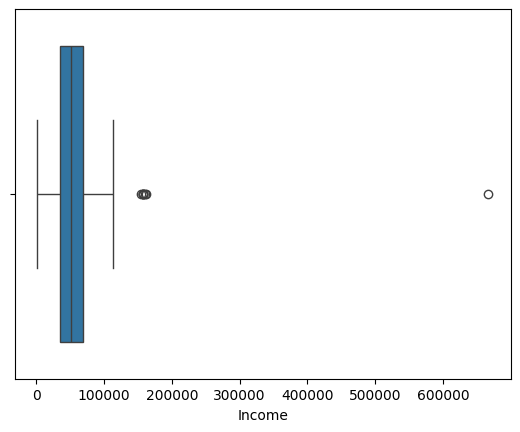

In [27]:
sns.boxplot(x = df['Income'])

Terdapat outlier pada kolom ['Income'] sehingga perlu dihapus agar tidak mempengaruhi hasil.

In [28]:
# 1. Hitung Q1, Q3, dan IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# 2. Tentukan batas bawah dan batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# 3. Filter data agar hanya data yang berada di antara batas itu
df = df[(df['Income'] >= batas_bawah) & (df['Income'] <= batas_atas)]

df_new = df[(df['Income'] >= batas_bawah) & (df['Income'] <= batas_atas)]
print('Jumlah data setelah hapus Outlier:', df_new.shape[0])

Jumlah data setelah hapus Outlier: 2205


In [29]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [30]:
# mengelompokkan kelas income berdasarkan penghasilan
income_range = [1730, 35196, 51287, 68281, 113734]

labels = ['low', 'medium', 'high', 'very high']

df['Income_Level'] = pd.cut (df['Income'], bins = income_range, labels = labels)
df['Income_Level'].value_counts()

Income_Level
low          552
high         551
very high    551
medium       550
Name: count, dtype: int64

### Kolom Marital Status

In [31]:
# Mencari Nilai unique dari Marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Keterangan:
Terdapat 8 tipe jawaban, namun terdapat jawaban yang tidak umum seperti 'Alone', 'Absurd', 'YOLO'. Bisa diasumsikan bahwa {'Alone' : 'Single'}, {'Absurd' : 'Single'}, 'YOLO' atau 'You Only Live Once' di sini bisa diterjemakan sebagai orang yang tidak terikat komitmen dan 'bebas', sehingga bisa diasumsikan sebagai 'Single'.

In [32]:
df['Marital_Status'].nunique() # jumlah jawaban yang unik

8

In [33]:
df['Marital_Status'].value_counts()

Marital_Status
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [34]:
df[df['Marital_Status'] == 'YOLO'] # single dengan 1 anak

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Age,Age_Group,Income_Level
2154,2177,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,0,2012,39,adult,medium
2179,2202,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,1,2012,39,adult,medium


In [35]:
df[df['Marital_Status'] == 'Absurd'] # tidak ada anak, maka bisa kita asumsikan sebagai single

,index,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Age,Age_Group,Income_Level
2070,2093,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,0,1,1,0,0,1,2012,19,teenager,very high
2111,2134,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,0,0,0,0,0,0,2014,57,elder,high


In [36]:
# mengelompokkan marital status
df ['Marital_Status'] = df ['Marital_Status'].replace({
    'Alone': 'Single',
    'Together': 'Married',
    'Widow': 'Widow',
    'Divorced': 'Separated',
    'Absurd': 'Single',
    'YOLO' : 'Single'})

In [37]:
df['Marital_Status'].value_counts() # melihat total pelanggan/ status

Marital_Status
Married      1422
Single        477
Separated     230
Widow          76
Name: count, dtype: int64

In [38]:
df['Marital_Status'].value_counts(normalize = True) * 100 # persentase masing2 status

Marital_Status
Married      64.489796
Single       21.632653
Separated    10.430839
Widow         3.446712
Name: proportion, dtype: float64

KETERANGAN:
- Married: status pelanggan telah menikah
- Single: status pelanggan lajang
- Separated: status pelanggan telah bercerai
- Widow: status pelanggan yang telah ditinggal pasangan

### Kolom Education

In [39]:
# mencari nilai unique di kolom Education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [40]:
df['Education'].value_counts()

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

Keterangan:
- Graduation: Graduation dapat diinterpretasikan sebagai lulusan Sarjana S1
- PhD: Gelar PhD adalah gelar doktor yang paling tinggi dalam suatu pendidikan akademik (S3)
- Master: Gelar Master atau S2 Gelar Magister atau pascasarjana 
- Basic: Status edukasi Basic di sini merupakan status pendidikan di bawah Sarjana
- 2nd Cycle: Bisa diasumsikan sebagai kegiatan singkat setelah lulus Master

### Kolom Anak

In [41]:
# membuat kolom baru dengan kondisi tertentu
df['Child_Status'] = np.where (df['Kidhome'] + df['Teenhome'] == 0, 'Not Have Child', 'Have Child')

### Kolom Recency
Dari kolom recency, kita bisa menentukan status pelanggan aktif atau tidak. Bisa dinilai dari terakhir belanja < 60 hari (2 bulan), maka terdaftar sebagai pelanggan aktif, dan vice versa.

In [42]:
df['Recency'].describe()

count    2205.000000
mean       49.009070
std        28.932111
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Bisa dilihat dari kolom described di atas, terdapat pelanggan yang baru belanja di hari itu, dan pelanggan yang paling lama terakhir belanja ada di 99 hari, which kurang lebih terakhir belanja 3 bulan yang lalu.

In [43]:
# membuat kolom baru Customer_Status dengan kondisi tertentu
df['Customer_Status'] = np.where (df['Recency'] <= 60, 'Active', 'Passive')

### Kolom Complain

In [44]:
# membuat kolom baru dengan interpretasi lebih jelas
df['Complain_Label'] = np.where(df['Complain'] == 1, 'Complain', 'No Complain')

# Cleaned Data and 2nd Checking

In [45]:
df.columns # melihat kolom

Index(['index', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Year', 'Age',
       'Age_Group', 'Income_Level', 'Child_Status', 'Customer_Status',
       'Complain_Label'],
      dtype='object')

In [46]:
df = df.drop(['Customer_Year', 'Kidhome', 'Teenhome', 'Complain'], axis = 1).reset_index() 

In [47]:
display(df.head(), df.tail())

,level_0,index,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Age_Group,Income_Level,Child_Status,Customer_Status,Complain_Label
0,0,0,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,...,0,0,0,1,55,elder,high,Not Have Child,Active,No Complain
1,1,1,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,...,0,0,0,0,60,elder,medium,Have Child,Active,No Complain
2,2,2,1965,Graduation,Married,71613.0,2013-08-21,26,426,49,...,0,0,0,0,48,adult,very high,Not Have Child,Active,No Complain
3,3,3,1984,Graduation,Married,26646.0,2014-02-10,26,11,4,...,0,0,0,0,30,adult,low,Have Child,Active,No Complain
4,4,4,1981,PhD,Married,58293.0,2014-01-19,94,173,43,...,0,0,0,0,33,adult,high,Have Child,Passive,No Complain


,level_0,index,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Age_Group,Income_Level,Child_Status,Customer_Status,Complain_Label
2200,2211,2235,1967,Graduation,Married,61223.0,2013-06-13,46,709,43,...,0,0,0,0,46,adult,high,Have Child,Active,No Complain
2201,2212,2236,1946,PhD,Married,64014.0,2014-06-10,56,406,0,...,0,1,0,0,68,elder,high,Have Child,Active,No Complain
2202,2213,2237,1981,Graduation,Separated,56981.0,2014-01-25,91,908,48,...,0,0,0,0,33,adult,high,Not Have Child,Passive,No Complain
2203,2214,2238,1956,Master,Married,69245.0,2014-01-24,8,428,30,...,0,0,0,0,58,elder,very high,Have Child,Active,No Complain
2204,2215,2239,1954,PhD,Married,52869.0,2012-10-15,40,84,3,...,0,0,0,1,58,elder,high,Have Child,Active,No Complain


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   level_0                  2205 non-null   int64         
 1   index                    2205 non-null   int64         
 2   Year_Birth               2205 non-null   int64         
 3   Education                2205 non-null   object        
 4   Marital_Status           2205 non-null   object        
 5   Income                   2205 non-null   float64       
 6   Dt_Customer              2205 non-null   datetime64[ns]
 7   Recency                  2205 non-null   int64         
 8   MntWines                 2205 non-null   int64         
 9   MntFruits                2205 non-null   int64         
 10  MntMeatProducts          2205 non-null   int64         
 11  MntFishProducts          2205 non-null   int64         
 12  MntSweetProducts         2205 non-

In [49]:
import pandas as pd

# Simpan ke file CSV baru
df.to_csv('data_bersih.csv', index = False)

# Data Analysis

## a. Analisis Demografi Pelanggan
Tujuan: untuk memahami pelanggan

### 1. Jumlah Customer Supermarket

In [50]:
df.shape

(2205, 31)

Total pelanggan customer yang mendaftar member sebanyak 2205, dengan total 31 kolom.

### 2 Jumlah Pelanggan per-Kelompok Usia? (Teenager, Young Adult, Adult, Elder)

In [51]:
df['Age'].describe()

print(jumlah_pelanggan)

Age_Group
teenager         10
young adult     181
adult          1289
elder           733
Name: count, dtype: int64


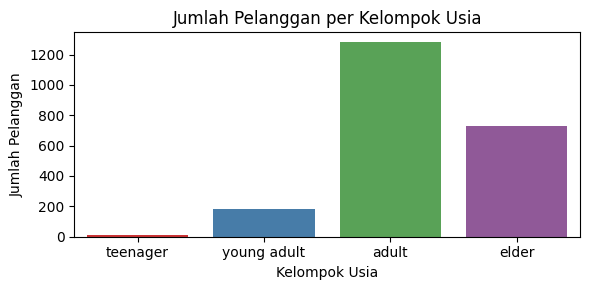

In [52]:
# Hitung jumlah customer per kelompok usia
age_counts = df['Age_Group'].value_counts().sort_index()

# Buat bar chart
plt.figure(figsize = (6,3))
sns.barplot(x = age_counts.index, y = age_counts.values, palette = 'Set1')

plt.title('Jumlah Pelanggan per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

Kelompok berdasarkan usia
- teenager -> <= 19 tahun
- young adult -> 20 - 27 tahun
- adult -> 28 - 49 tahun
- elder -> >= 50 tahun

### 3. Apakah ada hubungan dari Banyaknya Income dengan usia mereka?

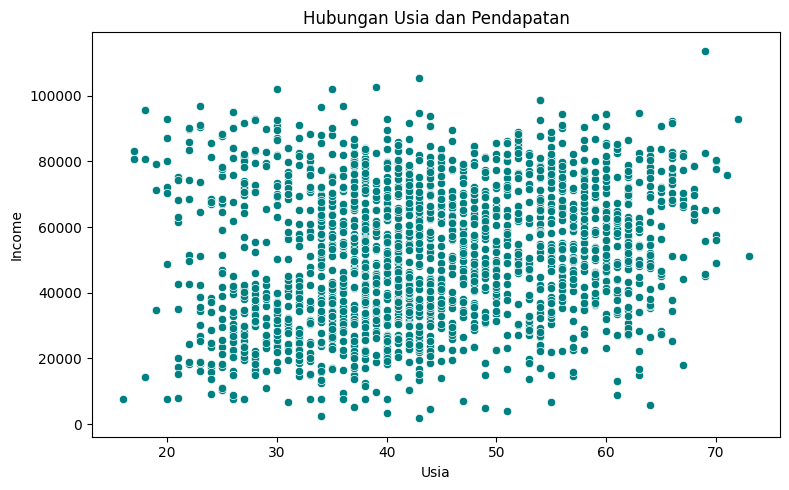

In [53]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = df,  x = 'Age', y = 'Income', color = 'Teal')
plt.title('Hubungan Usia dan Pendapatan')
plt.xlabel('Usia')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

**Dari Grafik Scatterplot di atas, bisa diambil insights sebagai berikut:**
- Perseberan grafik cukup merata, artinya pelanggan berasal dari berbagai usia
- Tidak terlihat bahwa semakin tinggi usia semakin tinggi pula incomenya. Meskipun ada pula income tinggi namun tidak bisa di sama ratakan.
- Kecenderungan: Income justru bervariasi secara acak di setiap usia.
- Usia 30-60 memiliki income berkisar 30.000 - 70.000, persebaran datanya padat di bagian tengah. Sehingga bisa diasumsikan sebagai pelanggan dominan, secara jumlah dan potensi daya beli.

In [54]:
# uji korelasi
df['Age'].corr(df['Income'])

np.float64(0.21343976109134014)

Berdasarkan analisis korelasi, bisa dilihat kolom ['Age'] dan ['Income'] nilai korelasinya 0.21, korelasi positif lemah. Artinya, ada kecenderungan bahwa semakin tua pelanggan, pendapatannya sedikit lebih tinggi, namun hubungan tersebut tidak signifikan secara kuat. Maka dari itu, usia tidak begitu memengaruhi besarnya income pelanggan.

### 4. Apakah tingkat pendidikan memengaruhi pendapatan pelanggan?

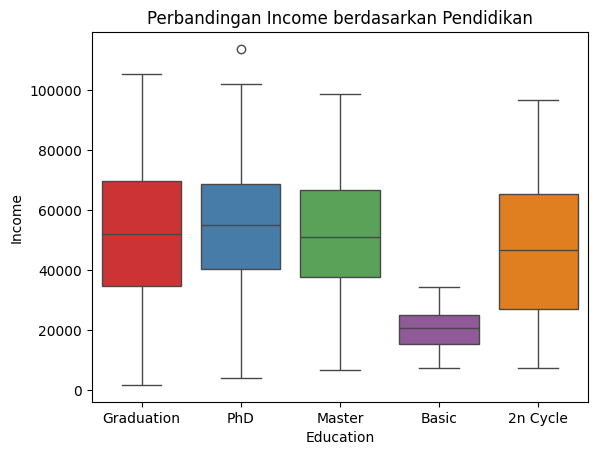

In [55]:
sns.boxplot(x = 'Education', y = 'Income', data = df, palette = 'Set1')
plt.title('Perbandingan Income berdasarkan Pendidikan')
plt.show()

Insights dari Boxplot:
- Pelanggan dengan tingkat pendidikan ['Basic'] memiliki pendapatan median yang paling rendah dan rentang pendapatan yang sempit, menandakan kelompok ini cenderung homogen dengan daya beli yang terbatas
- Kelompok dengan pendidikan ['Graduation'], ['PhD'], ['Master'], dan ['2nCycle'] menunjukkan median pendapatan yang lebih tinggi dan variasi yang lebih besar. Hal ini menandakan bahwa semakin tinggi tingkat pendidikan, semakin besar peluang seseorang memiliki pendapatan tinggi.
- Terdapat pula beberapa outlier pendapatan tinggi pada kategori pendidikan tinggi, menunjukkan adanya pelanggan dengan daya beli sangat besar dalam kelompok tersebut.

In [56]:
# Kelompokkan Income berdasarkan kategori Education
from scipy import stats

basic = df[df['Education'] == 'Basic']['Income']
graduation = df[df['Education'] == 'Graduation']['Income']
master = df[df['Education'] == 'Master']['Income']
phd = df[df['Education'] == 'PhD']['Income']
cycle = df[df['Education'] == '2n Cycle']['Income']

# Uji ANOVA
f_stat, p_value = stats.f_oneway (basic, graduation, master, phd, cycle)

print("F-Statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Ada perbedaan signifikan pendapatan antar kelompok pendidikan.")
else:
    print("Tidak ada perbedaan signifikan.")


F-Statistic: 39.12533829626313
p-value: 1.0965632726151262e-31
Ada perbedaan signifikan pendapatan antar kelompok pendidikan.


### 5. Apakah orang berpenghasilan tinggi berbelanja lebih banyak secara nominal?

In [57]:
# membuat variabel berdasarkan jumlah uang yang dihabiskan tiap produk
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum (axis = 1)
df['TotalSpend'].describe()

# uji korelasi
from scipy.stats import pearsonr
corr, p_value = pearsonr (df['Income'], df['TotalSpend'])

print(f'Korelasi: {corr}, p-value: {p_value}')
# Cek signifikansi
if p_value < 0.05:
    print("Ada hubungan signifikan antara pendapatan dan total belanja.")
else:
    print("Tidak ada hubungan signifikan antara pendapatan dan total belanja.")

Korelasi: 0.8237696997821239, p-value: 0.0
Ada hubungan signifikan antara pendapatan dan total belanja.


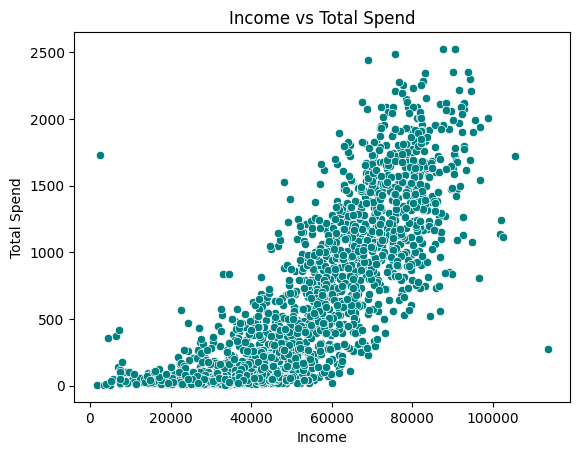

In [58]:
# visualisasi
sns.scatterplot(x = 'Income', y = 'TotalSpend', data = df, color = 'Teal')
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

Dari scatterplot di atas, bisa diambil insights sebagai berikut:
- Terlihat pola naik ke kanan - artinya semakin tinggi pendapatan, cenderung semakin tinggi juga pengeluarannya.
- Ini menunjukkan adanya hubungan positif antara pendapatan dan total belanja.
- Dari sebaran data dan ditambah dengan nilai korelasi sebelumnya (corr = 0.82), ini tergolong korelasi kuat. Artinya, orang dengan pendapatan tinggi cenderung belanja lebih banyak secara nominal.
- Pada level pendapatan rendah (misalnya < 30.000), sebagian besar pengeluaran juga rendah.
- Namun semakin naik pendapatan, variasi pengeluaran makin besar - artinya tidak semua orang kaya menghabiskan banyak, tapi kemungkinan besar mereka punya daya beli lebih tinggi.

Kesimpulan:
Orang dengan pendapatan yang lebih tinggi cenderung membelanjakan lebih banyak uang, yang didukung oleh korelasi positif yang kuat dan pola pada scatter plot ini.

### 6. Persentase Pelanggan berdasarkan Marital Status
Berdasarkan asumsi bahwa Supermarket ini memusatkan target pada sebuah keluarga

In [59]:
stats_marr = df['Marital_Status'].value_counts()
print(stats_marr)

Marital_Status
Married      1422
Single        477
Separated     230
Widow          76
Name: count, dtype: int64


In [60]:
# Persentase Marital Status
stats_marr = df['Marital_Status'].value_counts(normalize=True) * 100
print(stats_marr)

Marital_Status
Married      64.489796
Single       21.632653
Separated    10.430839
Widow         3.446712
Name: proportion, dtype: float64


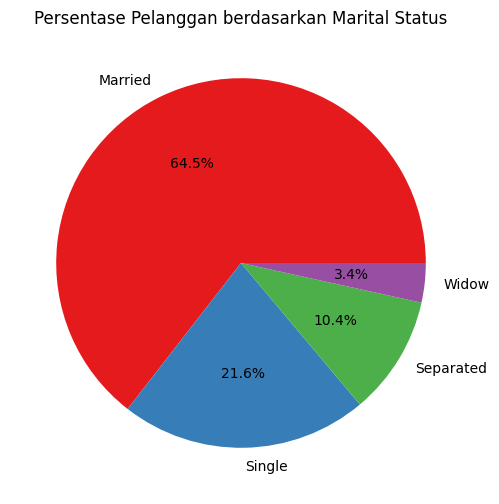

In [61]:
# visualisasi
plt.figure(figsize=(6,6))
colors = sns.color_palette('Set1')

stats_marr.plot.pie(autopct = '%1.1f%%', colors = colors)
plt.title('Persentase Pelanggan berdasarkan Marital Status')
plt.ylabel('')
plt.show()


## b. Analisis Perilaku Belanja dan Penjualan

### 1. Jumlah dan Persentase Pelanggan Aktif ['Customer_Status']

In [62]:
# jumlah pelanggan aktif dan pasif
df['Customer_Status'].value_counts()

Customer_Status
Active     1359
Passive     846
Name: count, dtype: int64

Keterangan:
- Active: pembelian terakhir pelanggan tidak lebih dari 60 hari
- Passive: pembelian terakhir pelanggan lebih dari 60 hari (2-3 bulan)

In [63]:
# persentase
df['Customer_Status'].value_counts(normalize = True) * 100

Customer_Status
Active     61.632653
Passive    38.367347
Name: proportion, dtype: float64

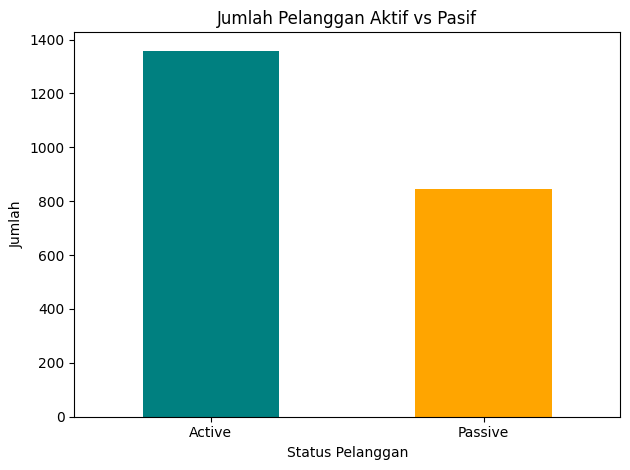

In [64]:
# visualisasi
# Hitung jumlah berdasarkan Customer_Status
status_counts = df['Customer_Status'].value_counts()

# Visualisasi
status_counts.plot(kind = 'bar', color = ['teal', 'orange'])
plt.title('Jumlah Pelanggan Aktif vs Pasif')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


### 2. Produk yang paling banyak dibeli berdasarkan kalangan (Usia, Marital_Status, Income, Education)?

In [65]:
# Berdasarkan Usia (dengan membuat variabel kumpulan produk dan dijumlah berdasarkan rata-rata)
produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']

produk_by_age = df.groupby('Age_Group')[produk].mean()
produk_by_age

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_Group,,,,,,
teenager,290.600000,29.300000,325.000000,76.600000,40.700000,53.200000
young adult,261.187845,31.447514,204.364641,38.154696,30.171271,44.138122
adult,272.019501,24.798752,145.532761,34.418877,25.416537,40.944618
elder,377.299180,27.926230,188.114754,42.972678,29.188525,49.363388


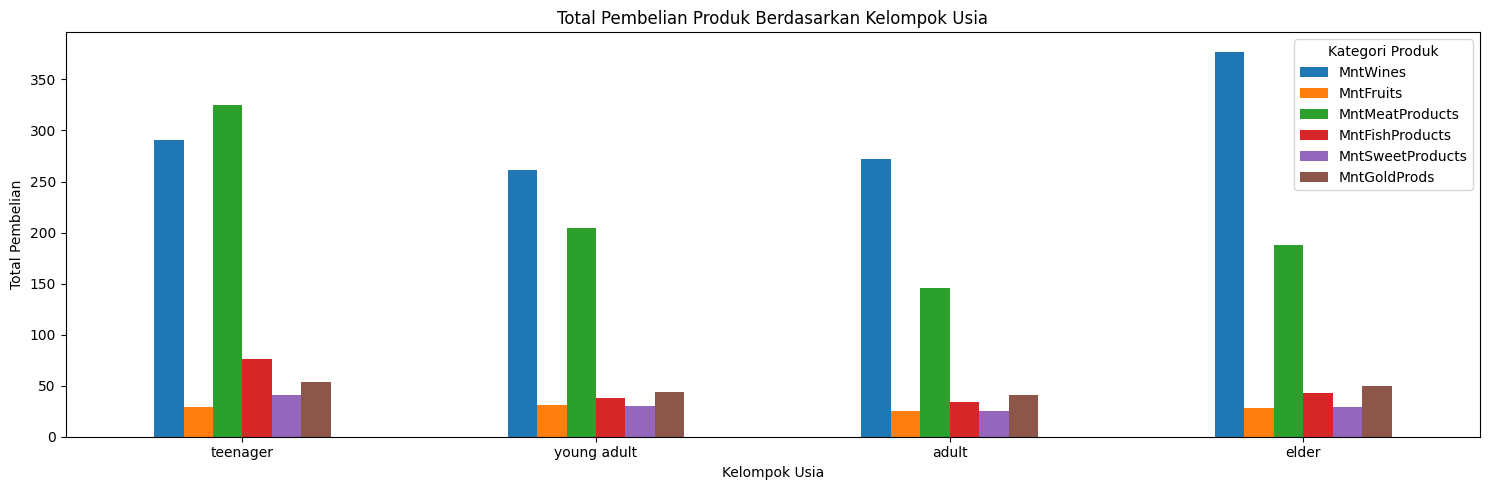

In [66]:
# visualisasi
produk_by_age.plot(kind = 'bar', figsize = (15,5))
plt.title('Total Pembelian Produk Berdasarkan Kelompok Usia')
plt.ylabel('Total Pembelian')
plt.xlabel('Kelompok Usia')
plt.xticks(rotation = 0)
plt.legend(title = 'Kategori Produk')
plt.tight_layout()
plt.show()

Interpretasi:
- Kelompok usia “Adult” (dewasa) membeli paling banyak secara keseluruhan, terutama:
    - MntWines (produk wine) → terlihat sangat dominan.
    - MntMeatProducts juga tinggi di kelompok ini.
- Kelompok “Elder” masih cukup tinggi untuk Wine dan Daging, tapi lebih rendah dibanding Adult.
- Kelompok “Young Adult” dan “Teenager” kontribusinya jauh lebih kecil di semua kategori produk.
- Kategori produk paling populer (secara umum): Wines, Daging dan diikuti Gold dan Ikan 

In [67]:
# Berdasarkan Marital_Status (dengan membuat variabel kumpulan produk dan dijumlah berdasarkan rata-rata)
# Total pengeluaran produk per marital status
produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']

produk_by_marstat = df.groupby('Marital_Status')[produk].mean()
produk_by_marstat


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Married,304.307314,25.607595,160.144866,37.018987,26.641350,43.052039
Separated,327.600000,27.634783,151.473913,35.313043,27.030435,46.578261
Single,291.651992,27.310273,184.199161,39.197065,26.916143,43.958071
Widow,367.131579,31.868421,185.328947,49.907895,37.868421,55.855263


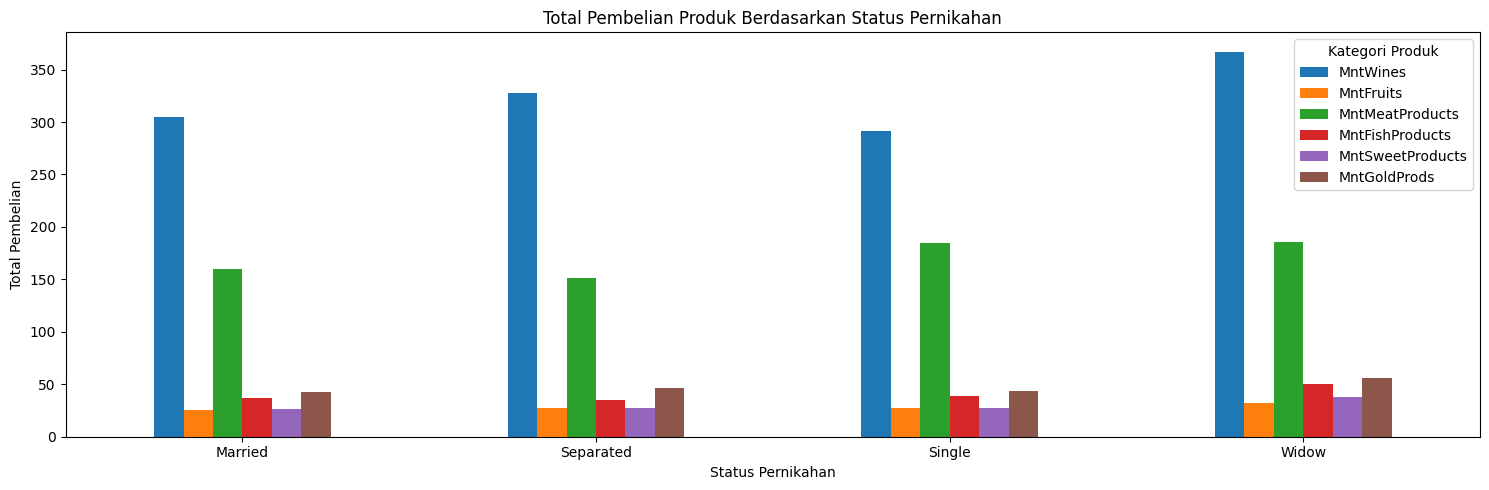

In [68]:
# visualisasi
produk_by_marstat.plot(kind = 'bar', figsize = (15,5))
plt.title('Total Pembelian Produk Berdasarkan Status Pernikahan')
plt.ylabel('Total Pembelian')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation = 0)
plt.legend(title = 'Kategori Produk')
plt.tight_layout()
plt.show()

Insights:
- berdasarkan status pernikahan, produk WINES yang paling laku
- penjualan DAGING termasuk produk yang memasuki peringkat kedua setelah wines
- peringkat ketiga ada di Gold
- dan peringkat terakhir ada di produk buah


In [69]:
# berdasarkan income pelanggan
produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']

produk_by_income = df.groupby('Income_Level')[produk].mean()
produk_by_income

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income_Level,,,,,,
low,21.561594,5.954710,22.721014,8.692029,5.940217,16.891304
medium,124.414545,7.996364,48.054545,13.530909,8.465455,27.318182
high,435.237750,30.433757,158.299456,39.312160,28.205082,59.208711
very high,644.185118,61.277677,432.513612,89.566243,65.954628,72.907441


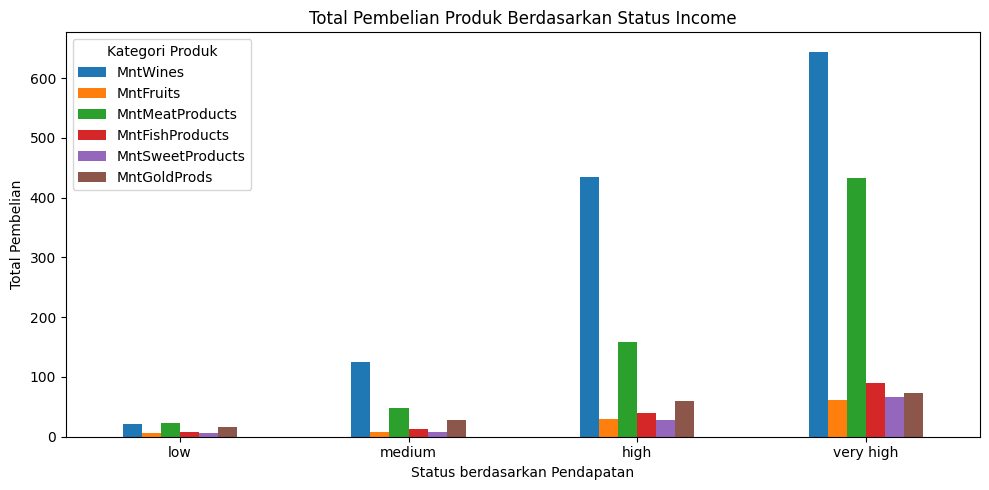

In [70]:
# visualisasi
produk_by_income.plot(kind = 'bar', figsize = (10,5))
plt.title('Total Pembelian Produk Berdasarkan Status Income')
plt.ylabel('Total Pembelian')
plt.xlabel('Status berdasarkan Pendapatan')
plt.xticks(rotation = 0)
plt.legend(title = 'Kategori Produk')
plt.tight_layout()
plt.show()

Insights:
- pembelian lebih tinggi > pembelian lebih banyak
- Kelompok "very high" income memiliki total pembelian tertinggi di semua kategori produk, terutama pada:
    a. MntWines (paling menonjol)
    b. MntMeatProducts
    c. Diikuti oleh MntGoldProds & MntFishProducts
- Di semua kelompok income, dua kategori yang konsisten paling banyak dibeli adalah wines dan daging
- Kelompok "low income" membeli semua kategori produk dalam jumlah yang sangat kecil.
- Ini menunjukkan sensitivitas terhadap harga atau kemungkinan keterbatasan daya beli.

In [71]:
# berdasarkan income Education
produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

produk_by_edu = df.groupby('Education')[produk].mean()
produk_by_edu

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,285.804133,30.930818,179.312668,43.523810,31.367475,50.807727
Master,333.788462,21.431319,163.343407,31.574176,20.865385,40.277473
PhD,409.573529,20.012605,163.571429,26.897059,20.411765,32.256303


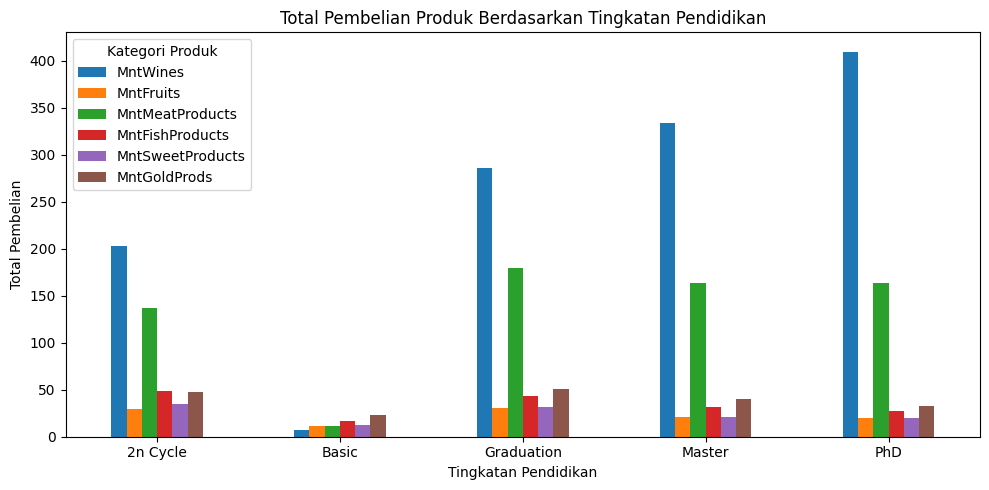

In [72]:
# visualisasi
produk_by_edu.plot(kind = 'bar', figsize = (10,5))
plt.title('Total Pembelian Produk Berdasarkan Tingkatan Pendidikan')
plt.ylabel('Total Pembelian')
plt.xlabel('Tingkatan Pendidikan')
plt.xticks(rotation = 0)
plt.legend(title = 'Kategori Produk')
plt.tight_layout()
plt.show()

Insights:
- Semakin Tinggi Pendidikan, Semakin Tinggi Konsumsi
- Pola kenaikan pembelian produk terlihat signifikan mulai dari tingkat Basic → Graduation → Master → PhD.
- Kategori MntWines dan MntMeatProducts mengalami kenaikan paling jelas.
- Menunjukkan bahwa tingkat pendidikan berkorelasi dengan daya beli dan preferensi terhadap produk premium.

### 3. Statitik Deskriptif

In [73]:
# jumlah, rata-rata, min, max dari setiap produk
penjualan = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

penjualan.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [74]:
# jumlah dan rata-rata/ produk
print('Jumlah penjualan setiap produk:','\n', penjualan.sum()) 
print()
print('Rata-rata penjualan setiap produk:', '\n', penjualan.mean())

Jumlah penjualan setiap produk: 
 MntWines            675093
MntFruits            58219
MntMeatProducts     364513
MntFishProducts      83253
MntSweetProducts     59818
MntGoldProds         97146
dtype: int64

Rata-rata penjualan setiap produk: 
 MntWines            306.164626
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
MntSweetProducts     27.128345
MntGoldProds         44.057143
dtype: float64


### 4. Pola Penjualan

In [75]:
# total penjualan setiap tahun
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Year'] = df['Dt_Customer'].dt.year

df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

penjualan_tahunan = df.groupby('Year')['Total_Spend'].sum().reset_index()
penjualan_tahunan

,Year,Total_Spend
0,2012,364116
1,2013,702473
2,2014,271453


Semakin tahun, penjualan menurun.

### 5. Jumlah Campaign yang digunakan Pelanggan

In [76]:
total_campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = df[total_campaign].sum().sort_values(ascending=False)

df['Total_Campaign_Accepted'] = df[total_campaign].sum(axis=1)
df['Total_Campaign_Accepted'].value_counts()

Total_Campaign_Accepted
0    1747
1     322
2      81
3      44
4      11
Name: count, dtype: int64

Setelah total campaign 1-5 dijumlahkan, hasil respons campaign setiap campaign menurun hingga respons campaign terakhir sangat sedikit.

### 5.1 Respon Campaign berdasarkan Kelompok Usia

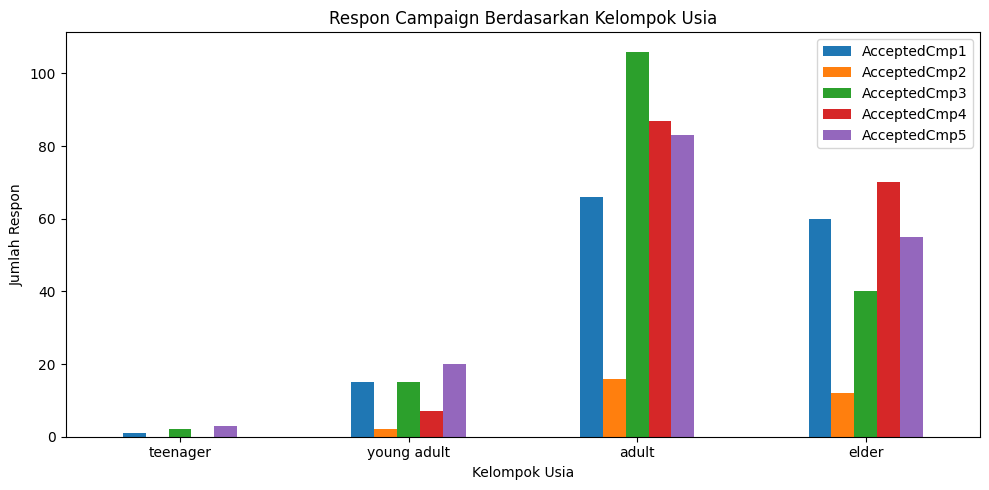

In [77]:
df.groupby('Age_Group')[total_campaign].sum().plot(kind = 'bar', figsize = (10,5))
plt.title('Respon Campaign Berdasarkan Kelompok Usia')
plt.ylabel('Jumlah Respon')
plt.xlabel('Kelompok Usia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.2 Keterangan [Aktif/ Pasif] seorang Pelanggan yang menerima Campaign

In [78]:
# Apakah pelanggan aktif lebih banyak menerima campaign?
df.groupby('Customer_Status')[total_campaign].sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Customer_Status,,,,,
Active,91,15,110,93,99
Passive,51,15,53,71,62


In [79]:
# respon pelanggan terhadap campaign terakhir
df['Response'].value_counts() # keterangan 1 iya, 0 tidak

Response
0    1872
1     333
Name: count, dtype: int64

# c. Analisis Media

### 1. Jumlah Pembelian setiap Saluran

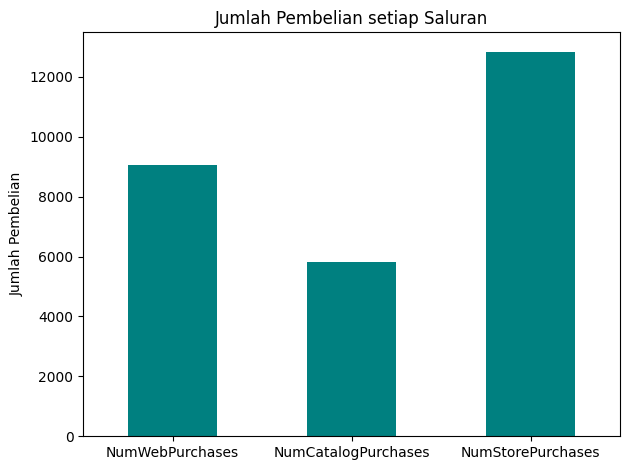

In [80]:
# Jumlah Pembelian setiap Saluran
media_sum = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
media_sum.plot(kind='bar', color = 'teal', title = 'Jumlah Pembelian setiap Saluran')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insights:
- jumlah pembelian di toko/ offline termasuk yang paling diminati
- jumlah pembelian yang paling sedikit ada di pembelian melalui catalog
- jumlah pembelian melalui website termasuk purchase method kedua setelah offline method

### 2. Medium Berbelanja berdasarkan kalangan Usia

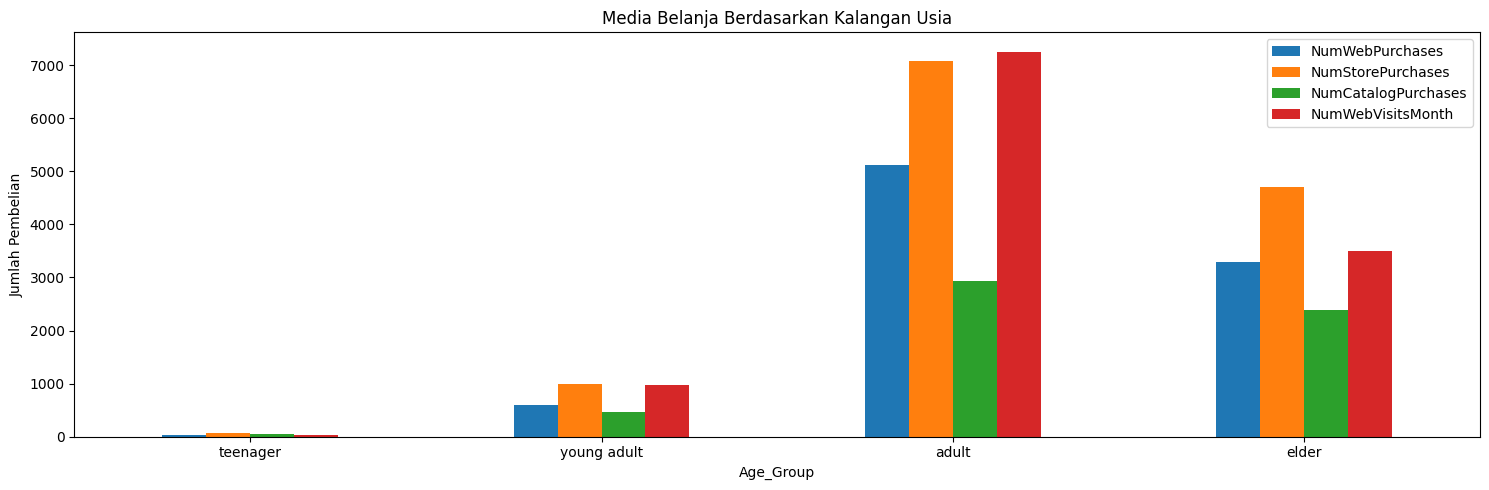

In [81]:
media_sum = df.groupby('Age_Group')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']].sum()
media_sum.plot(kind='bar', figsize = (15, 5))
plt.title('Media Belanja Berdasarkan Kalangan Usia')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [82]:
# 1 promo yang tepat untuk 
# 2 weekdays promo untuk ibu rumah tangga (daily)
# 3 weekends untuk keluarga, anak kos, orang kerja relaksasi (r)
# 4 promo setelah gajian kek tanggal 25.

# Kesimpulan dan Saran

## Demografi Pelanggan

1. Total Pelanggan yang mendaftar Membership ada +- 2200 sekian customer
2. Total pelanggan berdasarkan kalangan Usia:
    - Teenager: 10
    - Young Adult: 181
    - Adult: 1289
    - Elder: 733
3. Total pelanggan yang aktif dan pasif
    - Active     1359
    - Passive     846
4. Total pelanggan berdasarkan marital Status (persentase)
    - Married      64.489796
    - Single       21.632653
    - Separated    10.430839
    - Widow         3.446712
5. Pelanggan memiliki background pendidikan yang bervariasi dan hal itu berpengaruh terhadap income.




# Performa Penjualan

Produk Wine dan Daging adalah produk favorit pelanggan dewasa.
Segmentasi pemasaran bisa difokuskan ke usia Adult dan Elder, khususnya untuk Wine, Daging, dan Produk Emas.
Promosi pada kelompok usia muda (Teenager & Young Adult) belum terlalu efektif atau mereka memang belum menjadi target pasar utama